In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
%matplotlib notebook
%cd /mnt/scratch-lustre/flin/binary-lens
FileName = 'data/test_spectrum_' #smooth
#FileName = 'data/test3_parallel_' #non-smooth

/mnt/scratch-lustre/flin/binary-lens


<IPython.core.display.Javascript object>


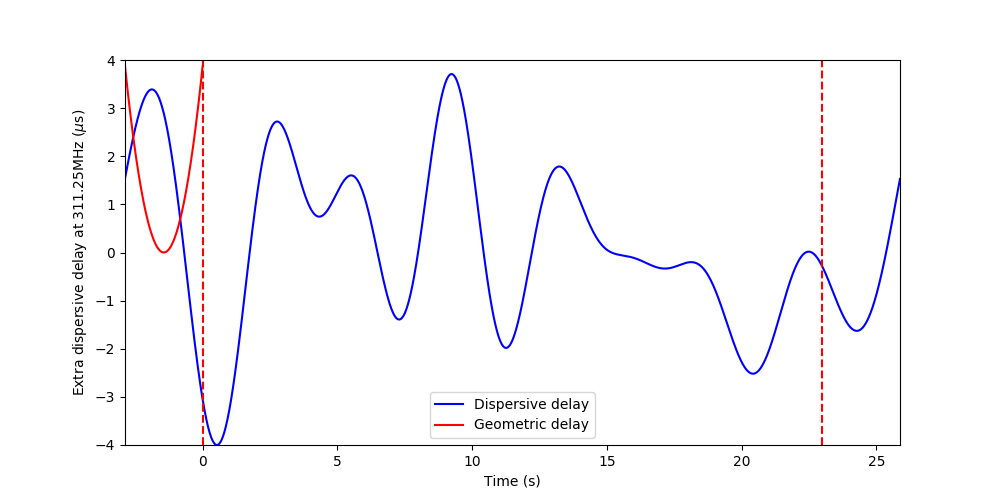

In [2]:
dispath = np.load(FileName+'Dis.npy')
geopath = np.load(FileName+'Geo.npy')

t1 = np.linspace(-23./8,23.+23./8,8000)
t2 = np.linspace(-23./8,23./6400,801)

plt.figure(figsize=(10,5))
plt.plot(t1,dispath*10**6,'b',label="Dispersive delay")
plt.plot(t2,geopath*10**6,'r',label="Geometric delay")
plt.legend(loc='best')
plt.plot((23./6400, 23./6400), (-4, 4), 'r--')
plt.plot((23.-23./6400, 23.-23./6400), (-4, 4), 'r--')
plt.xlim(-23./8,23+23./8)
plt.ylim(-4,4)
plt.xlabel("Time (s)")
plt.ylabel("Extra dispersive delay at 311.25MHz ($\mu$s)")

In [3]:
spec = np.squeeze(np.load(FileName+'311.25'+'Spec'+format(800, '04')+'to'+format(800+100, '04')+'.npy'))
#spec = np.load(FileName+'311.25'+'Spec'+format(800, '04')+'to'+format(800+50, '04')+'.npy')
for i in np.arange(900,7200,100):
    spec = np.append(spec, np.squeeze(np.load(FileName+'311.25'+'Spec'+format(i, '04')+'to'+format(i+100, '04')+'.npy')), axis=0)
#spec = np.squeeze(spec)

spec = np.abs(spec)

print np.shape(spec)
#unlensed = spec[2500,:]
unlensed = np.abs(np.load(FileName+'UnlensedSpec.npy'))
for i in range(len(unlensed)):
    spec[:,i] = spec[:,i]/unlensed[i]
print np.shape(unlensed)

spec = spec.T

(19200, 1501)
(1501,)


<IPython.core.display.Javascript object>


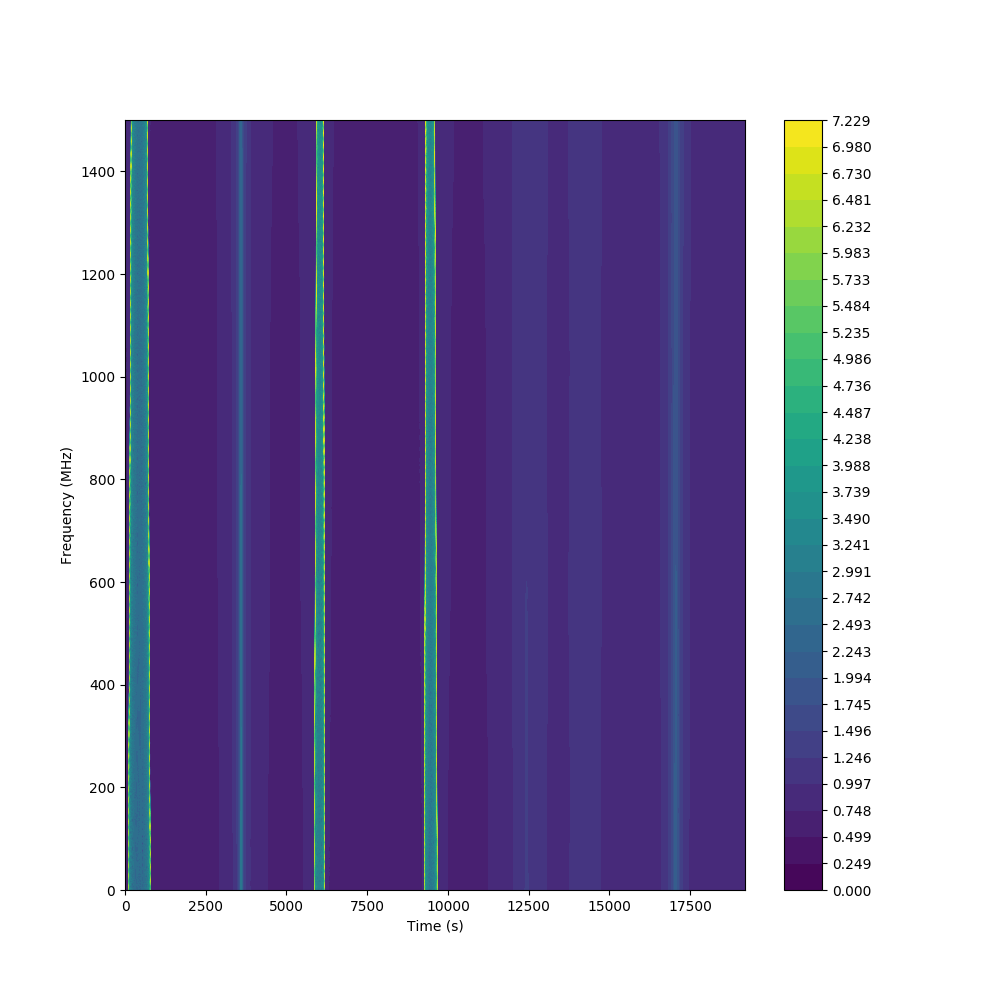

In [4]:
scale = np.linspace(0, np.amax(np.abs(spec)), 30, endpoint=True) #
y,x = np.shape(spec)
#x = np.linspace(0,23,x)
#y = np.linspace(311.25,327.25,y)
x = np.arange(x)
y = np.arange(y)
X, Y = np.meshgrid(x,y)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contourf(X,Y, spec, scale, cmap=cm.viridis)
cbar = fig.colorbar(cs, ticks=scale)

#ax.set_title('Spectrum')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (MHz)')

<IPython.core.display.Javascript object>


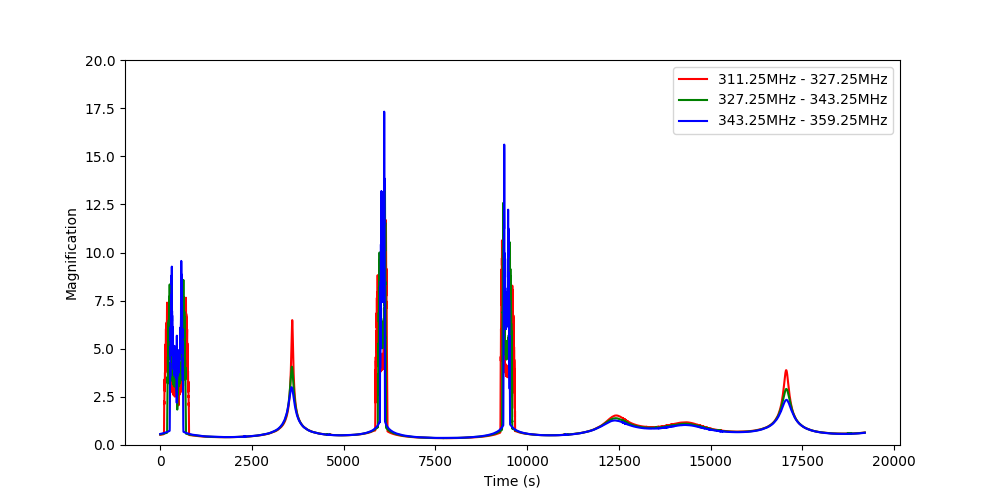

(0, 20)

In [12]:
magch1 = []
magch2 = []
magch3 = []
t = np.linspace(0,23,19200)
plt.figure(figsize=(10,5))
scan = np.load('data/test3_parallel_Scan.npy')
for i in np.arange(800,7200,50):
    magch1 = np.append(magch1,np.load(FileName+'311.25'+'Mag'+format(i, '04')+'to'+format(i+50, '04')+'.npy'))
    magch2 = np.append(magch2,np.load(FileName+'327.25'+'Mag'+format(i, '04')+'to'+format(i+50, '04')+'.npy'))
    magch3 = np.append(magch3,np.load(FileName+'343.25'+'Mag'+format(i, '04')+'to'+format(i+50, '04')+'.npy'))
plt.plot(magch1, label="311.25MHz - 327.25MHz", color='r')
plt.plot(magch2, label="327.25MHz - 343.25MHz", color='g')
plt.plot(magch3, label="343.25MHz - 359.25MHz", color='b')
plt.ylabel("Magnification")
plt.xlabel("Time (s)")
plt.legend(loc='best')
#plt.xlim(0,23)
plt.ylim(0,20)

<IPython.core.display.Javascript object>


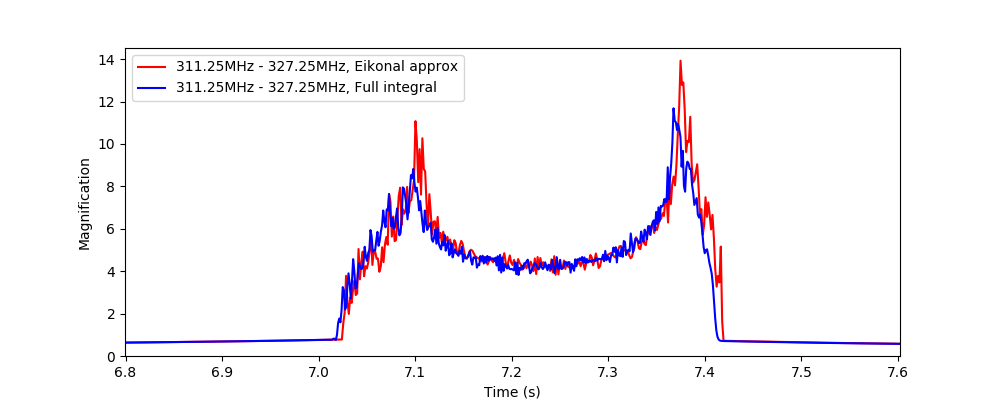

(0, 15)

In [43]:
magch1_eikon = []
magch1_pathint = []
plt.figure(figsize=(10,4))
t = np.linspace(0,23,16000)
t2 = np.linspace(0,23,19200)
for i in np.arange(200,1800,200):
    magch1_eikon = np.append(magch1_eikon,np.load('data/test2'+'CH1'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))

for i in np.arange(800,7200,50):
    magch1_pathint = np.append(magch1_pathint,np.load(FileName+'311.25'+'Mag'+format(i, '04')+'to'+format(i+50, '04')+'.npy'))

plt.plot(t,magch1_eikon, label="311.25MHz - 327.25MHz, Eikonal approx", color='r')
plt.plot(t2,magch1_pathint, label="311.25MHz - 327.25MHz, Full integral", color='b')
plt.ylabel("Magnification")
plt.xlabel("Time (s)")
plt.legend(loc='best')
plt.xlim(0,23)
plt.ylim(0,15)

<IPython.core.display.Javascript object>


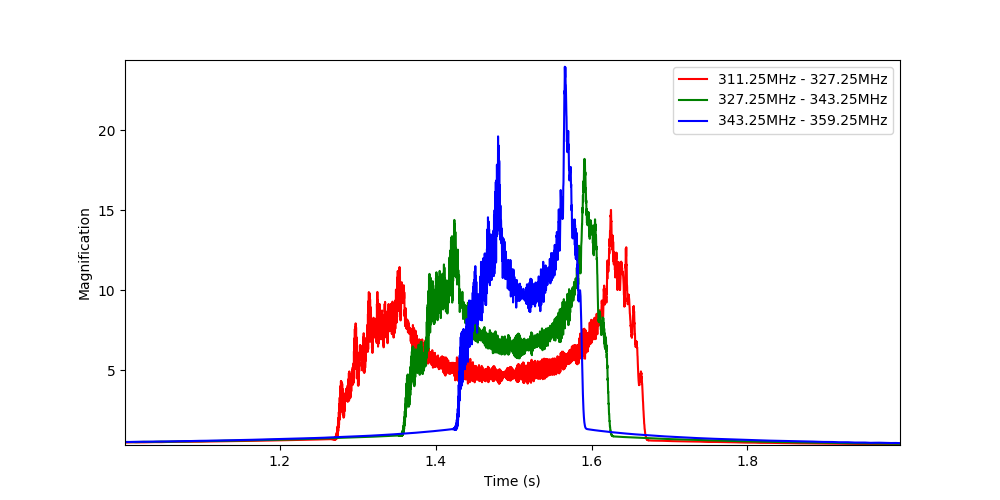

(0, 25)

In [10]:
magch1 = []
magch2 = []
magch3 = []
t = np.linspace(0,23./8.,16000/8*10)
plt.figure(figsize=(10,5))
for i in [600]:
    magch1 = np.append(magch1,np.load('data/test2_10x_pathint_'+'CH1'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch2 = np.append(magch2,np.load('data/test2_10x_pathint_'+'CH2'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch3 = np.append(magch3,np.load('data/test2_10x_pathint_'+'CH3'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
plt.plot(t,magch1, label="311.25MHz - 327.25MHz", color='r')
plt.plot(t,magch2, label="327.25MHz - 343.25MHz", color='g')
plt.plot(t,magch3, label="343.25MHz - 359.25MHz", color='b')
plt.ylabel("Magnification")
plt.xlabel("Time (s)")
plt.legend(loc='best')
plt.xlim(0,23./8.)
plt.ylim(0,25)

<IPython.core.display.Javascript object>


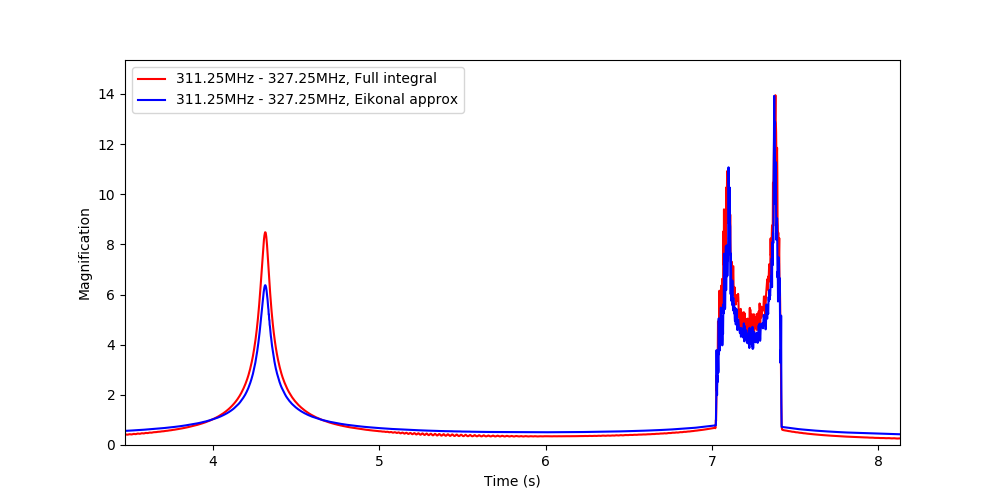

(0, 25)

In [12]:
magch1_eikon = []
magch1_pathint = []
plt.figure(figsize=(10,5))
t = np.linspace(0,23,16000)
for i in np.arange(200,1800,200):
    magch1_eikon = np.append(magch1_eikon,np.load('data/test3_pathint_'+'CH1'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch1_pathint = np.append(magch1_pathint,np.load('data/test2'+'CH1'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
plt.plot(t,magch1_eikon, label="311.25MHz - 327.25MHz, Full integral", color='r')
plt.plot(t,magch1_pathint, label="311.25MHz - 327.25MHz, Eikonal approx", color='b')
plt.ylabel("Magnification")
plt.xlabel("Time (s)")
plt.legend(loc='best')
plt.xlim(0,23)
plt.ylim(0,25)

<IPython.core.display.Javascript object>


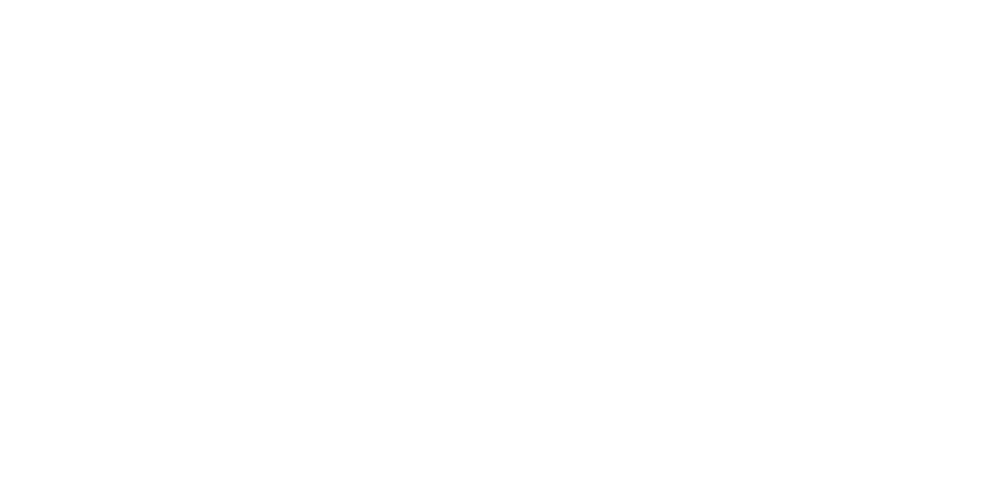

IOError: [Errno 2] No such file or directory: 'data/test3_pathint_CH1Mag200to400.npy'

In [7]:
magch1 = []
magch2 = []
magch3 = []
plt.figure(figsize=(10,5))
t = np.linspace(0,23,16000)
for i in np.arange(200,1800,200):
    magch1 = np.append(magch1,np.load('data/test3_pathint_'+'CH1'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch2 = np.append(magch2,np.load('data/test3_pathint_'+'CH2'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch3 = np.append(magch3,np.load('data/test3_pathint_'+'CH3'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
plt.plot(t,magch1, label="311.25MHz - 327.25MHz, Magnification", color='r')
plt.plot(t,magch2, label="327.25MHz - 343.25MHz, Magnification", color='g')
plt.plot(t,magch3, label="343.25MHz - 359.25MHz, Magnification", color='b')
plt.ylabel("Magnification")
plt.xlabel("Time (s)")
plt.legend(loc='best')
plt.xlim(0,23)
plt.ylim(0,30)

<IPython.core.display.Javascript object>


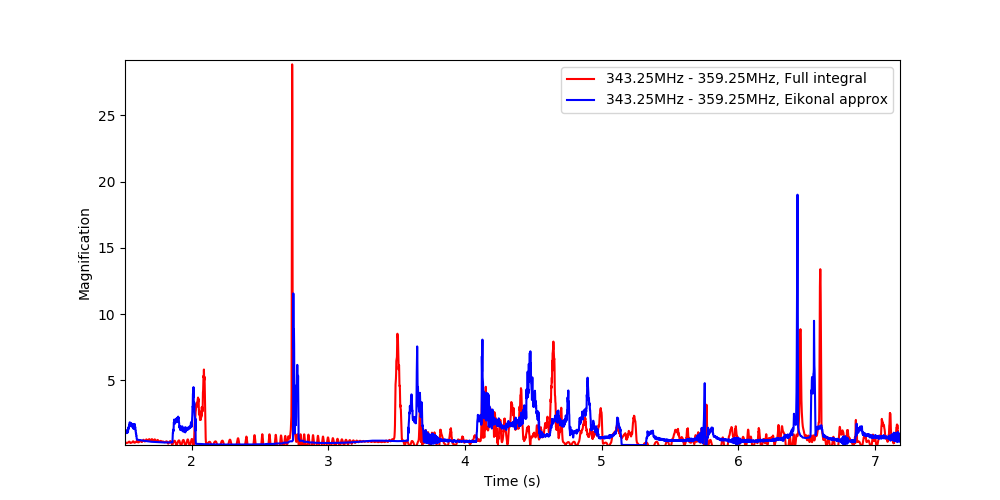

(0, 30)

In [18]:
magch1_eikon = []
magch1_pathint = []
plt.figure(figsize=(10,5))
t = np.linspace(0,23,16000)
for i in np.arange(200,1800,200):
    magch1_eikon = np.append(magch1_eikon,np.load('data/test3_pathint_'+'CH3'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch1_pathint = np.append(magch1_pathint,np.load('data/test3'+'CH3'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
plt.plot(t,magch1_eikon, label="343.25MHz - 359.25MHz, Full integral", color='r')
plt.plot(t,magch1_pathint, label="343.25MHz - 359.25MHz, Eikonal approx", color='b')
plt.ylabel("Magnification")
plt.xlabel("Time (s)")
plt.legend(loc='best')
plt.xlim(0,23)
plt.ylim(0,30)

<IPython.core.display.Javascript object>


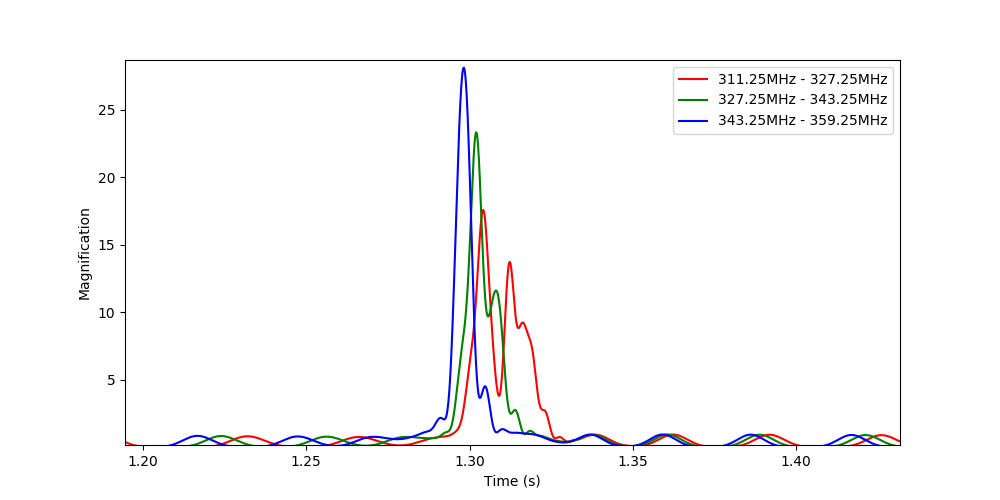

(0, 30)

In [20]:
magch1 = []
magch2 = []
magch3 = []
t = np.linspace(0,23./8.,16000/8*10)
plt.figure(figsize=(10,5))
for i in [300]:
    magch1 = np.append(magch1,np.load('data/test3_10x_pathint_'+'CH1'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch2 = np.append(magch2,np.load('data/test3_10x_pathint_'+'CH2'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch3 = np.append(magch3,np.load('data/test3_10x_pathint_'+'CH3'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
plt.plot(t,magch1, label="311.25MHz - 327.25MHz", color='r')
plt.plot(t,magch2, label="327.25MHz - 343.25MHz", color='g')
plt.plot(t,magch3, label="343.25MHz - 359.25MHz", color='b')
plt.ylabel("Magnification")
plt.xlabel("Time (s)")
plt.legend(loc='best')
plt.xlim(0,23./8.)
plt.ylim(0,30)

<IPython.core.display.Javascript object>


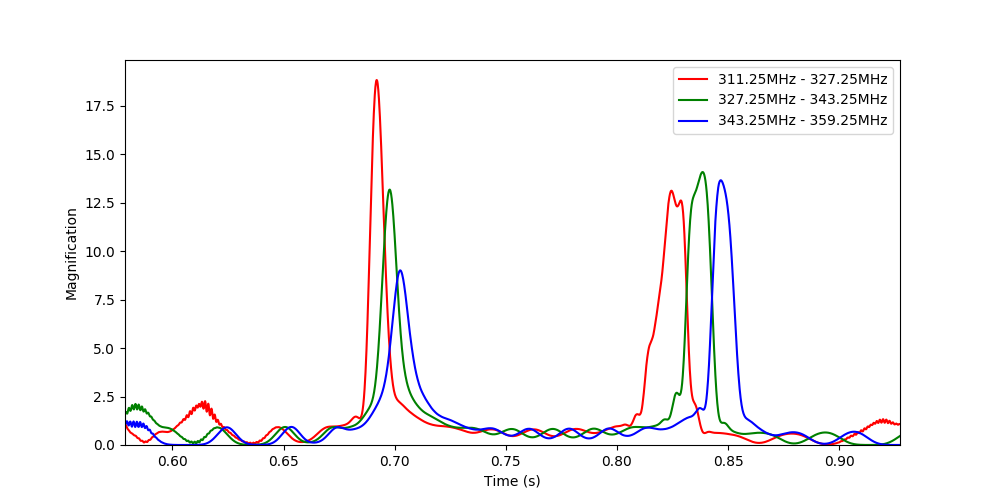

(0, 30)

In [21]:
magch1 = []
magch2 = []
magch3 = []
t = np.linspace(0,23./8.,16000/8*10)
plt.figure(figsize=(10,5))
for i in [600]:
    magch1 = np.append(magch1,np.load('data/test3_10x_pathint_'+'CH1'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch2 = np.append(magch2,np.load('data/test3_10x_pathint_'+'CH2'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch3 = np.append(magch3,np.load('data/test3_10x_pathint_'+'CH3'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
plt.plot(t,magch1, label="311.25MHz - 327.25MHz", color='r')
plt.plot(t,magch2, label="327.25MHz - 343.25MHz", color='g')
plt.plot(t,magch3, label="343.25MHz - 359.25MHz", color='b')
plt.ylabel("Magnification")
plt.xlabel("Time (s)")
plt.legend(loc='best')
plt.xlim(0,23./8.)
plt.ylim(0,30)

In [ ]:
magch1_eikon = []
magch2_eikon = []
magch3_eikon = []
magch1_pathint = []
magch2_pathint = []
magch3_pathint = []
t = np.linspace(0,23./8.,16000/8*10)
plt.figure(figsize=(10,11))
for i in [600]:
    magch1_eikon = np.append(magch1,np.load('data/test3_10x_pathint_'+'CH1'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch2_eikon = np.append(magch2,np.load('data/test3_10x_pathint_'+'CH2'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch3_eikon = np.append(magch3,np.load('data/test3_10x_pathint_'+'CH3'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch1_pathint = np.append(magch1,np.load('data/test3_10x_pathint_'+'CH1'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch2_pathint = np.append(magch2,np.load('data/test3_10x_pathint_'+'CH2'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
    magch3_pathint = np.append(magch3,np.load('data/test3_10x_pathint_'+'CH3'+'Mag'+str(i)+'to'+str(i+200)+'.npy'))
plt.plot(t,magch1, label="311.25MHz - 327.25MHz", color='r')
plt.plot(t,magch2, label="327.25MHz - 343.25MHz", color='g')
plt.plot(t,magch3, label="343.25MHz - 359.25MHz", color='b')
plt.ylabel("Magnification")
plt.xlabel("Time (s)")
plt.legend(loc='best')
plt.xlim(0,23./8.)
plt.ylim(0,30)